In [ ]:
import pandas as pd
import numpy as np

Data Load

In [ ]:
df=pd.read_csv('/content/Crop_Recommendation.csv')
df.sample(10)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
718,30,65,25,32.887338,64.594574,7.706509,71.505695,Blackgram
1832,38,14,30,26.924495,91.201060,5.570745,194.902214,Coconut
2139,113,21,33,26.022414,55.832890,7.277423,176.902092,Coffee
392,27,72,23,19.928895,21.799921,5.961934,64.026408,KidneyBeans
2162,118,40,35,26.350342,58.506502,7.460175,121.558630,Coffee
721,25,71,24,28.495387,60.448484,7.187722,74.915595,Blackgram
706,35,72,21,34.036195,64.287914,7.741419,66.855109,Blackgram
1451,101,17,47,29.494014,94.729813,6.185053,26.308209,Muskmelon
597,33,47,17,24.868040,48.275320,8.621514,63.918765,MothBeans
1567,27,120,200,21.452787,90.745319,6.110219,116.703658,Apple


In [ ]:
crop=[
    "Apple":0,
    "Banana":1,
    "Blackgram":2,
    "Blueberry
    "Coconut":4,
    "Coffee":5,
    "Cotton":6,
    "Grapes":7,
    "Jute":8,
    "Kidneybeans":9,
    "Lentil":10,
    "Maize":11,
    "Mango":12,
    "Grapes",
    "Mango",
    "Orange",
    "Papaya",
    "Pepper",
    "Potato",
    "Tomato
]

In [ ]:
df[df['crop_Encode']==3].iloc[0].Crop

'ChickPea'

In [ ]:
df.sample(10)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,crop_Encode
1389,112,25,51,25.047469,85.566728,6.932537,56.724967,Watermelon,21
1339,80,16,46,25.504055,81.402974,6.940236,48.478333,Watermelon,21
958,4,19,43,18.071330,93.145549,5.779427,106.360202,Pomegranate,19
1391,100,10,53,24.543570,84.608083,6.211749,42.006603,Watermelon,21
1712,44,64,54,29.807443,91.380485,6.742749,232.704613,Papaya,17
813,27,80,24,28.420628,61.773363,7.815211,49.023668,Lentil,10
92,81,45,35,26.528728,80.122675,6.158377,218.916357,Rice,20
657,9,48,20,29.664616,84.281876,6.377569,56.095420,MungBean,14
158,66,44,20,19.078147,69.022986,6.740001,80.725159,Maize,11
481,29,72,24,23.174096,36.678471,6.962386,162.593126,PigeonPeas,18


EDA Analysis

In [ ]:
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
crop_Encode    0
dtype: int64

In [ ]:
df['Crop'].value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

In [ ]:
df.shape

(2200, 9)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Nitrogen', ylabel='Density'>

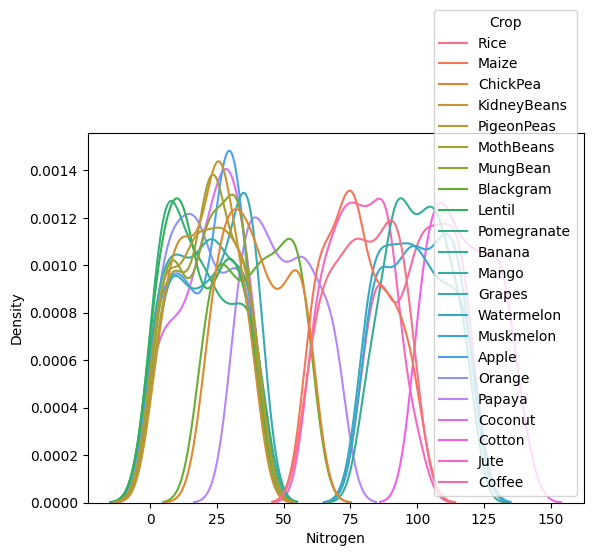

In [ ]:
sns.kdeplot(x='Nitrogen',data=df,hue='Crop')

<Axes: xlabel='Phosphorus', ylabel='Density'>

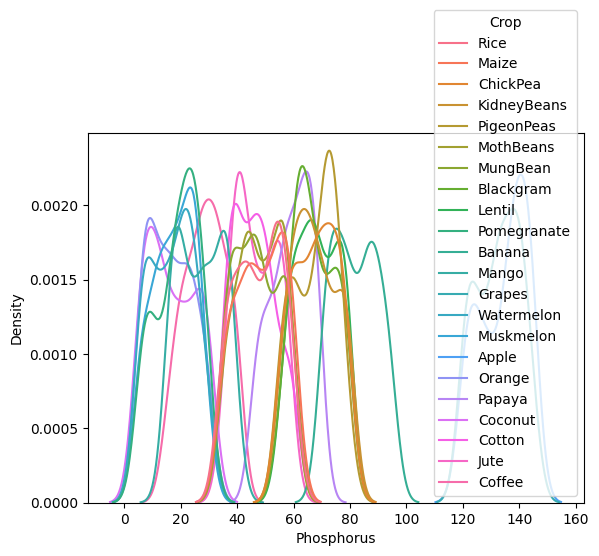

In [ ]:
sns.kdeplot(x='Phosphorus',data=df,hue='Crop')

<Axes: ylabel='Nitrogen'>

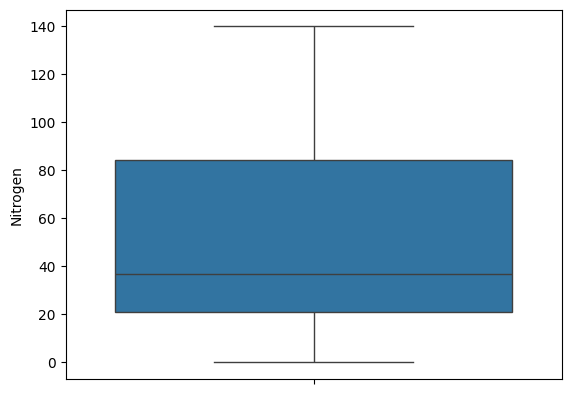

In [ ]:
sns.boxplot(df['Nitrogen'])

<Axes: ylabel='Phosphorus'>

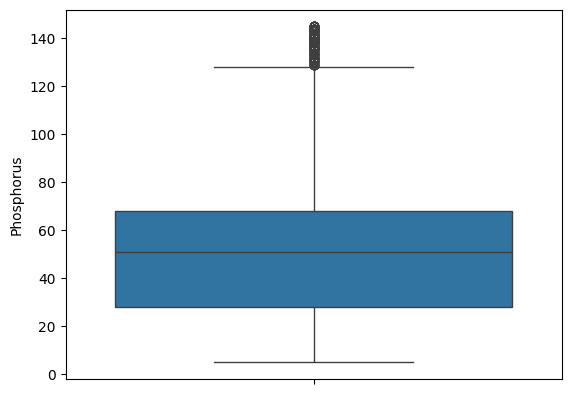

In [ ]:
sns.boxplot(df['Phosphorus'])

<Axes: ylabel='Potassium'>

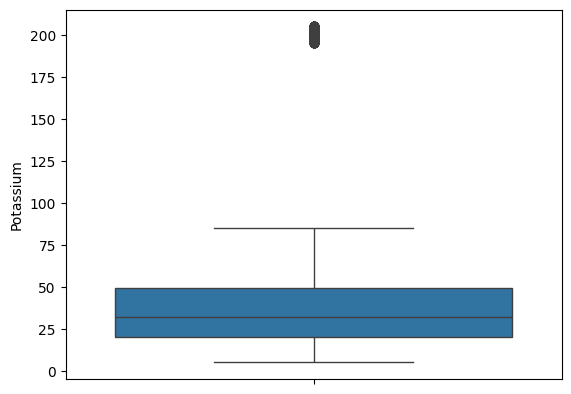

In [ ]:
sns.boxplot(df['Potassium'])

<Axes: ylabel='Temperature'>

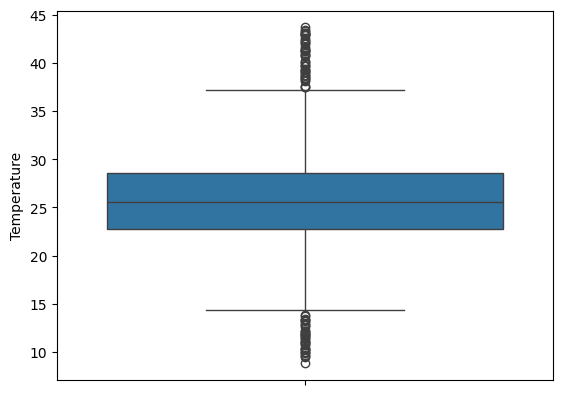

In [ ]:
sns.boxplot(df['Temperature'])

Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['crop_Encode']=le.fit_transform(df['Crop'])

In [ ]:
X=df.iloc[:,:-2]
y=df.iloc[:,-1]

In [ ]:
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: crop_Encode, Length: 2200, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Train The Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9931818181818182

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.9454545454545454

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.9863636363636363

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_ft,y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=nb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9954545454545455

In [ ]:
import pickle
pickle.dump(nb,open('model.pkl','wb'))
pickle.dump(sc,open('scaler.pkl','wb'))


In [ ]:
pickle.dump(df,open('df.pkl','wb'))